In [1]:
import pandas as pd
import pyodbc

conn = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=92.43.176.119;DATABASE=Indusoft;UID=UCN-DDD05;PWD=rQdj7KmG8p')
sqlQ = "SELECT TOP (100000) * FROM [Indusoft].[dbo].[DataCollectionBaand2]"

m2df = pd.read_sql(sqlQ,conn)
m2df.head()

,Date,Indgang 0401,Indgang 0402,Indgang 0403,Indgang 0404,Indgang 0405,Indgang 0406,Indgang 0407,Indgang 0408
0,2018-02-16 13:10:16,1,0,1,1,0,0,0,0
1,2018-02-16 13:10:16,1,0,1,1,0,1,0,0
2,2018-02-16 13:10:20,1,0,1,1,0,1,1,0
3,2018-02-16 13:10:20,1,0,1,1,0,1,0,0
4,2018-02-16 13:10:21,1,0,1,1,0,1,1,0


In [2]:
m2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Date            100000 non-null object
Indgang 0401    100000 non-null int64
Indgang 0402    100000 non-null int64
Indgang 0403    100000 non-null int64
Indgang 0404    100000 non-null int64
Indgang 0405    100000 non-null int64
Indgang 0406    100000 non-null int64
Indgang 0407    100000 non-null int64
Indgang 0408    100000 non-null int64
dtypes: int64(8), object(1)
memory usage: 6.9+ MB


In [5]:
m2df['Date'] = pd.to_datetime(m2df['Date'])
m2df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Date            100000 non-null datetime64[ns]
Indgang 0401    100000 non-null int64
Indgang 0402    100000 non-null int64
Indgang 0403    100000 non-null int64
Indgang 0404    100000 non-null int64
Indgang 0405    100000 non-null int64
Indgang 0406    100000 non-null int64
Indgang 0407    100000 non-null int64
Indgang 0408    100000 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 6.9 MB


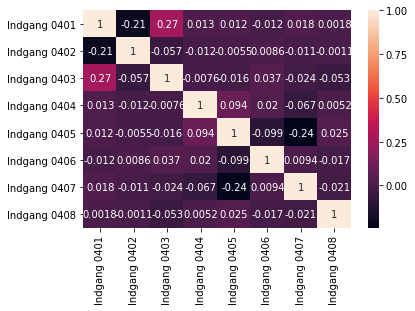

In [6]:
import seaborn as sns
sns.heatmap(m2df.corr(), annot = True)

In [14]:
df = m2df[['Indgang 0401','Indgang 0403']]
df = df.set_index(m2df['Date'])

In [15]:
df.head()

,Indgang 0401,Indgang 0403
Date,,
2018-02-16 13:10:16,1,1
2018-02-16 13:10:16,1,1
2018-02-16 13:10:20,1,1
2018-02-16 13:10:20,1,1
2018-02-16 13:10:21,1,1


In [18]:
df['Overlapping'] = df['Indgang 0401'] + df['Indgang 0403']
df.head()

,Indgang 0401,Indgang 0403,Overlapping
Date,,,
2018-02-16 13:10:16,1,1,2
2018-02-16 13:10:16,1,1,2
2018-02-16 13:10:20,1,1,2
2018-02-16 13:10:20,1,1,2
2018-02-16 13:10:21,1,1,2


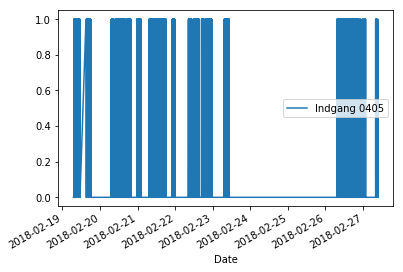

In [28]:
m2df.plot(x='Date',y='Indgang 0405')

In [29]:
condition = m2df['Date'] < '2018-02-24'
m2df.where(cond=condition, inplace=True)

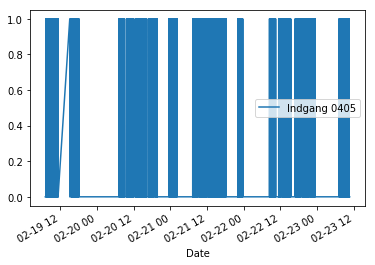

In [30]:
m2df.plot(x='Date',y='Indgang 0405')

In [31]:
condition = m2df['Date'] > '2018-02-20'
m2df.where(cond=condition, inplace=True)

In [32]:
condition = m2df['Date'] < '2018-02-21'
m2df.where(cond=condition, inplace=True)

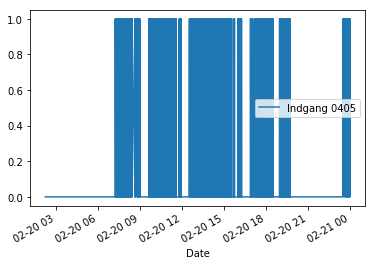

In [33]:
m2df.plot(x='Date',y='Indgang 0405')

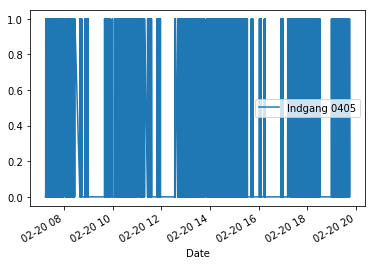

In [35]:
condition = m2df['Date'] > '2018-02-20 06:00:00'
m2df.where(cond=condition, inplace=True)
condition = m2df['Date'] < '2018-02-20 21:00:00'
m2df.where(cond=condition, inplace=True)

m2df.plot(x='Date',y='Indgang 0405')